# Proyect 1 : Image Classification using Convolutional Neural Networks


# **Selected dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
y_train data shape after encoding: (50000, 10)
y_test data shape after encoding: (10000, 10)


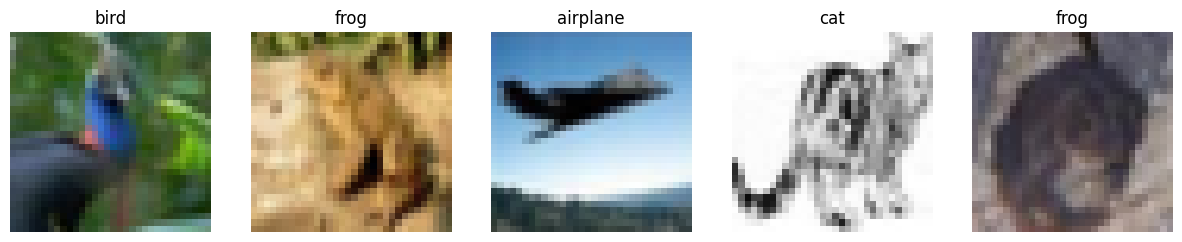

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset from Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Inspect data shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")

# Normalize images to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Inspect data shapes
print(f"y_train data shape after encoding: {y_train.shape}")
print(f"y_test data shape after encoding: {y_test.shape}")

# Visualize some examples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax = axes[i]
    idx = np.random.randint(0, X_train.shape[0])
    ax.imshow(X_train[idx])
    ax.set_title(class_names[np.argmax(y_train[idx])])
    ax.axis('off')
plt.show()

## Initial Model definition:

In [ ]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Define the model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten and fully connected layers
model.add(Flatten()) # This ensures the output is 1D
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 output classes

C:\Users\larry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Compilation

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training:

In [ ]:
#Train
#history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6602 - loss: 0.9670 - val_accuracy: 0.7405 - val_loss: 0.7578
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.6667 - loss: 0.9505 - val_accuracy: 0.7421 - val_loss: 0.7538
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.6691 - loss: 0.9460 - val_accuracy: 0.7370 - val_loss: 0.7662
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6717 - loss: 0.9254 - val_accuracy: 0.7379 - val_loss: 0.7714
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6805 - loss: 0.9113 - val_accuracy: 0.7308 - val_loss: 0.7718
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6813 - loss: 0.8992 - val_accuracy: 0.7378 - val_loss: 0.7709
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6857 - loss: 0.8919 - val_accuracy: 0.7398 - val_loss: 0.7642
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6829 -

**Metrics Calculation**

In [ ]:
#Accuracy and Loss:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7246 - loss: 0.8158
Test loss: 0.8197579979896545
Test accuracy: 0.7207000255584717


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

    airplane       0.77      0.76      0.76      1000
  automobile       0.87      0.83      0.85      1000
        bird       0.66      0.52      0.58      1000
         cat       0.54      0.49      0.51      1000
        deer       0.60      0.73      0.66      1000
         dog       0.64      0.61      0.63      1000
        frog       0.72      0.86      0.78      1000
       horse       0.82      0.72      0.77      1000
        ship       0.80      0.85      0.83      1000
       truck       0.80      0.83      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



Text(0.5, 1.0, 'Confusion Matrix')

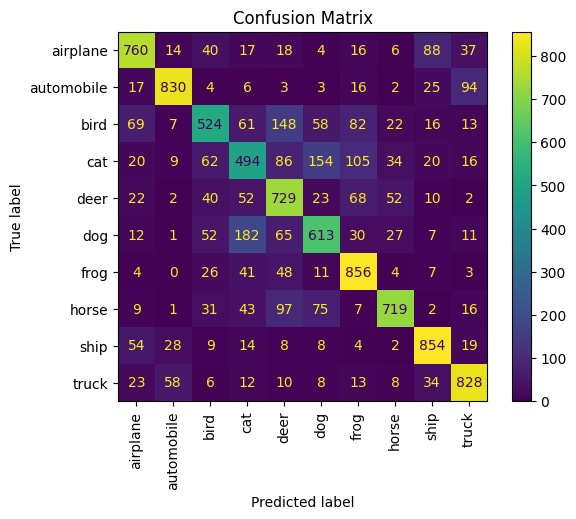

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions from the model
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and labels to single class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])

print(report)

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])
cmd.plot(cmap='viridis', xticks_rotation='vertical')
cmd.ax_.set_title("Confusion Matrix")

Save Initial Trained Model

In [ ]:
model.save('model_initial.keras')

## Defining Deeper Models:

In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the model
model_refined = Sequential()

# First convolutional block
model_refined.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_refined.add(BatchNormalization())
model_refined.add(MaxPooling2D((2, 2)))
model_refined.add(Dropout(0.25))

# Second convolutional block
model_refined.add(Conv2D(128, (3, 3), activation='relu'))
model_refined.add(BatchNormalization())
model_refined.add(MaxPooling2D((2, 2)))
model_refined.add(Dropout(0.25))

# Third convolutional block
model_refined.add(Conv2D(128, (3, 3), activation='relu'))
model_refined.add(BatchNormalization())
model_refined.add(MaxPooling2D((2, 2)))
model_refined.add(Dropout(0.4))

# Flatten and fully connected layers
model_refined.add(Flatten()) # This ensures the output is 1D
model_refined.add(Dense(512, activation='relu'))
model_refined.add(Dropout(0.5))
model_refined.add(Dense(10, activation='softmax'))  # 10 output classes

# Define optimizer with learning rate
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)

#Compilation:
model_refined.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
# Parameters description: monitor=>Metric to monitor, factor=>Factor by which the learning rate will be reduced, patience=>Number of epochs with no improvement to wait, and min_lr=>Minimum learning rate.
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Display Model Summary
model_refined.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,298 (1.88 MB)

 Trainable params: 491,658 (1.88 MB)

 Non-trainable params: 640 (2.50 KB)

In [9]:
#Train
history_refined = model_refined.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 150ms/step - accuracy: 0.2803 - loss: 2.2839 - val_accuracy: 0.3575 - val_loss: 2.2896 - learning_rate: 5.0000e-04
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 137ms/step - accuracy: 0.4655 - loss: 1.4733 - val_accuracy: 0.4730 - val_loss: 1.6386 - learning_rate: 5.0000e-04
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.5370 - loss: 1.2867 - val_accuracy: 0.5711 - val_loss: 1.2776 - learning_rate: 5.0000e-04
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.5845 - loss: 1.1696 - val_accuracy: 0.6432 - val_loss: 1.0084 - learning_rate: 5.0000e-04
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.6212 - loss: 1.0688 - val_accuracy: 0.5792 - val_loss: 1.2779 - learning_rate: 5.0000e-04
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 137ms/step - accuracy: 0.6390 - loss: 1.0151 - val_accuracy: 0.6361 - val_loss: 1.0553 - learning_rate: 5.0000e-04
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━

In [15]:
#Accuracy and Loss:
test_loss, test_acc = model_refined.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7841 - loss: 0.6279
Test loss: 0.6289911866188049
Test accuracy: 0.7825000286102295


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

    airplane       0.85      0.80      0.82      1000
  automobile       0.92      0.88      0.90      1000
        bird       0.75      0.71      0.73      1000
         cat       0.68      0.62      0.65      1000
        deer       0.75      0.83      0.79      1000
         dog       0.76      0.69      0.72      1000
        frog       0.82      0.89      0.85      1000
       horse       0.85      0.84      0.85      1000
        ship       0.83      0.92      0.87      1000
       truck       0.86      0.88      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



Text(0.5, 1.0, 'Confusion Matrix')

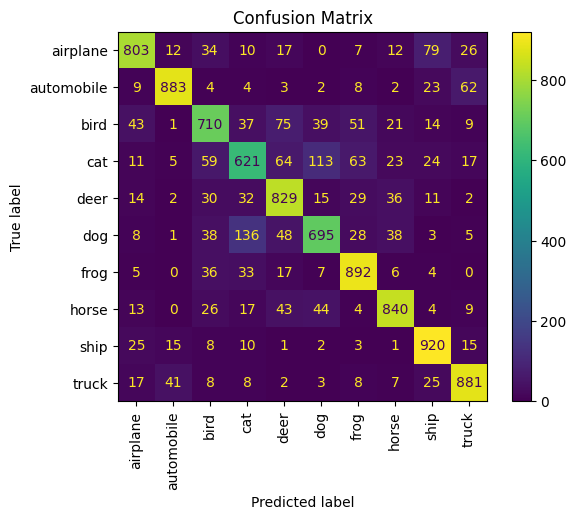

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions from the model
y_pred = model_refined.predict(X_test)

# Convert one-hot encoded predictions and labels to single class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])

print(report)

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])
cmd.plot(cmap='viridis', xticks_rotation='vertical')
cmd.ax_.set_title("Confusion Matrix")

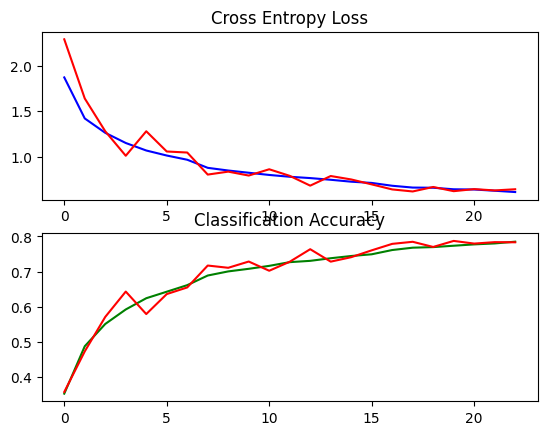

In [14]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_refined.history['loss'], color='blue', label='train')
plt.plot(history_refined.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_refined.history['accuracy'], color='green', label='train')
plt.plot(history_refined.history['val_accuracy'], color='red', label='val')
plt.show()

In [49]:
model_refined.save('model_final.keras')